In [13]:
import os
import tarfile
import zipfile
import json
import pandas as pd
import matplotlib.pyplot as plt

# Análise exploratória

In [14]:
data_path = '/content/drive/MyDrive/modulo10/ponderadas/sem08/animal_pose_estimation/'
keypoints_file = data_path + 'keypoints.json'

with open(keypoints_file, 'r') as f:
    keypoints_data = json.load(f)

print(f"total de imagens no dataset: {len(keypoints_data['images'])}")

print(json.dumps(keypoints_data['annotations'][:5], indent=4))

total de imagens no dataset: 4608
[
    {
        "image_id": 1,
        "bbox": [
            123,
            115,
            379,
            275
        ],
        "keypoints": [
            [
                193,
                216,
                1
            ],
            [
                160,
                217,
                1
            ],
            [
                174,
                261,
                1
            ],
            [
                204,
                186,
                1
            ],
            [
                152,
                182,
                1
            ],
            [
                0,
                0,
                0
            ],
            [
                0,
                0,
                0
            ],
            [
                273,
                168,
                1
            ],
            [
                0,
                0,
                0
            ],
            [
             

In [15]:
category_map = {category['id']: category['name'] for category in keypoints_data['categories']}

print(category_map)

{1: 'dog', 2: 'cat', 3: 'sheep', 4: 'horse', 5: 'cow'}


categorias disponíveis: {'dog', 'cat', 'horse', 'cow', 'sheep'}


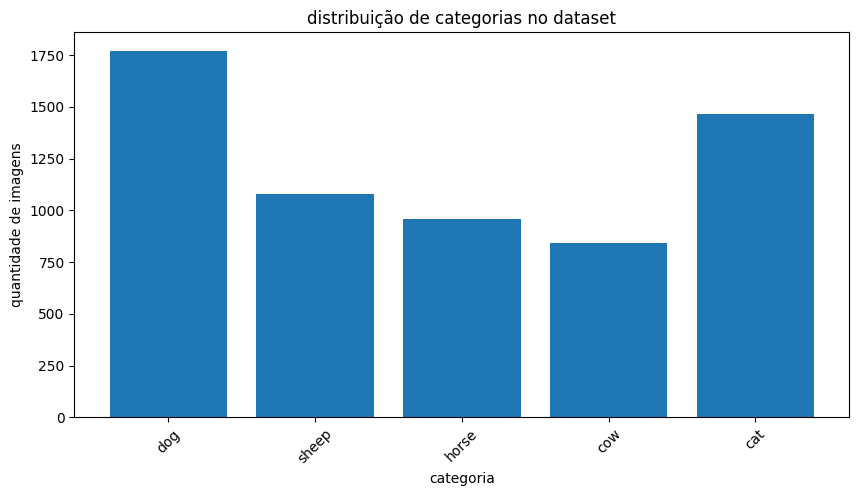

total de imagens da categoria 'cow': 842


In [16]:
category_counts = {}
for annotation in keypoints_data['annotations']:
    category_id = annotation['category_id']
    category_name = category_map.get(category_id, 'unknown')
    if category_name not in category_counts:
        category_counts[category_name] = 0
    category_counts[category_name] += 1

print(f"categorias disponíveis: {set(category_counts.keys())}")

plt.figure(figsize=(10, 5))
plt.bar(category_counts.keys(), category_counts.values())
plt.xlabel('categoria')
plt.ylabel('quantidade de imagens')
plt.title('distribuição de categorias no dataset')
plt.xticks(rotation=45)
plt.show()

cow_count = category_counts.get('cow', 0)
print(f"total de imagens da categoria 'cow': {cow_count}")


# Filtragem dataset

In [17]:
cow_images = [annotation['image_id'] for annotation in keypoints_data['annotations'] if category_map.get(annotation['category_id']) == 'cow']
print(f"número de imagens de bovinos: {len(cow_images)}")


número de imagens de bovinos: 842


# Resultados finais

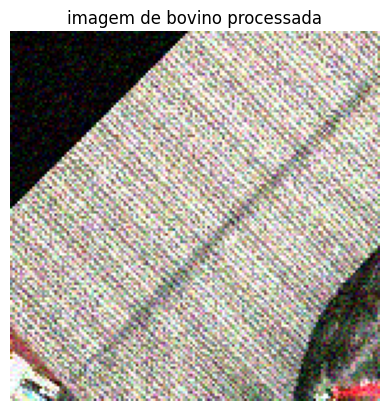

In [18]:
from PIL import Image, ImageEnhance
import numpy as np

def process_image(image_path):
    image = Image.open(image_path)

    # 1. Rotação
    rotated_image = image.rotate(45)

    # 2. Ajuste de brilho
    enhancer = ImageEnhance.Brightness(rotated_image)
    bright_image = enhancer.enhance(1.5)

    # 3. Normalização
    normalized_image = np.array(bright_image) / 255.0

    # 4. Adição de ruído
    noise = np.random.normal(0, 0.1, normalized_image.shape)
    noisy_image = normalized_image + noise
    noisy_image = np.clip(noisy_image, 0, 1)

    # 5. Recorte
    cropped_image = Image.fromarray((noisy_image * 255).astype('uint8')).crop((50, 50, 200, 200))

    return cropped_image

# Exemplo de processamento de uma imagem de bovino
example_image_path = data_path + 'images/2007_000063.jpg'
processed_image = process_image(example_image_path)

# Mostrando a imagem processada
plt.imshow(processed_image)
plt.title('imagem de bovino processada')
plt.axis('off')
plt.show()
